#Типы распознавания изображений
Выделяют четыре задачи распознавания изображений:

1. Semantic segmentation. Нейронная сеть на выходе для каждого пикселя выдаёт вероятность его принадлежности к каждому классу.
2.Object recognition. Нейронная сеть получает на вход изображение с ровно одним объектом и возвращает координаты содержащего объект прямоугольника и его класс.
3. Object detection. На картинке есть несколько объектов, сеть должна обвести прямоугольником и предсказать класс для каждого объекта. (архитектуры Faster
R-CNN и YOLO).
4. Instance segmentation.


### Семантическая сегментация
В задаче семантической сегментации цель - из исходного изображения размером **W × H × 3** получить матрицу **W × H**, содержащую предсказанные идентификаторы классов, соответствующие всем пикселям.
Семантическая сегментация отличается от обнаружения объекта, поскольку она не показывает никаких ограничивающих рамок вокруг объекта. Также не делается различий между разными экземплярами одного и того же класса.


## Сегментация изображений с использованием глубокого обучения

### Теория

#### Кодер и декодер


Как правило, архитектура модели включает несколько сверточных слоев, нелинейную активацию, пакетную нормализацию и слои объединения.
На начальных слоях модель изучает черты изображения низкого уровня, такие как края и цвета, а на более поздних слоях - черты высокого уровня, такие как различия объектов.
На ранних уровнях модели нейроны содержат информацию о небольшой области изображения, а на более поздних уровнях нейроны содержат информацию о большой области изображения. Следовательно, по мере добавления слоев размер изображения продолжает уменьшаться, а количество каналов продолжает увеличиваться.
Для задачи семантической сегментации необходимо сохранить пространственную информацию, используются полностью сверточные сети - FCNN.
За счет комбинирования сверточных слоев с пулинговыми слоями и/или за счет смещений в сверточных слоях, производится дробление изображения с одновременным увеличением количества каналов. Тем самым создается пространственная матрица небольшого размера с большим количеством каналов (карта признаков).
Далее производится обратное действие, с каждым слоем увеличивается размер матриц с одновременным уменьшением количества каналов - это архитектура автокодировщика.


####Пробрасывание информации. Латеральные связи.

В случае сбора архитектуры НС из последовательных слоев кодера и декодера, низкоуровневая информация может быть потеряна при сжатии. Следовательно, границы в карте сегментации, сгенерированной декодером, могут быть неточными и размытыми.
Чтобы восполнить недостающую информацию, можно передать (пробросить) низкоуровневую информацию со слоев кодера на слои декодера, объединив ее с информацией, передаваемой в декодере основным путем. Таким образом, формируются латеральные (боковые, или пропускные) связи в модели нейронной сети.

** Кодер-декодер с латеральными связями **

Пропускное соединение с более раннего уровня предоставляет слою декодера дополнительную информацию, необходимую для создания точной границы.
Сравнивая каждый пиксель выводимого сетью изображения (y_pred) с верным сегментированным изображением (y_true), находим ошибки, применяя функцию потери кросс-энтропии к каждому пикселю. Затем в модели вычисляются частные производные и пересчитываются веса нейронов для следующей итерации обучения.
В качестве меры точности применяются следующие функции:
* коэффициент Жаккара.
* коэффициент Сёренсена–Дайса


#### Данные для обучения и их расширение

В сегментированном изображении значение пикселя должно представлять идентификатор класса соответствующего пикселя. Это общий формат, используемый в большинстве наборов данных и keras_segmentation.

 Размер входного и сегментированного изображения должен быть одинаковым.


#### Модели для сегментации изображений


**FCN**

на основе VGG16 и более поздних https://keras.io/api/applications/vgg/

VGG - модель классификации, предложенная Оксфордским университетом, в конкурсе ImageNet 2013 достигла точности 92,7%. Для большинства существующих тестов сегментации VGG не работает с такой же точностью, как ResNet.


FCN - одна из первых предложенных моделей сквозной семантической сегментации. Здесь стандартные модели классификации изображений, такие как VGG и AlexNet, преобразуются в полную свертку, выполняя свертку уровня FC 1x1. В FCN транспонированная свертка используется для повышения частоты дискретизации, в отличие от других методов, использующих математическую интерполяцию.

Три варианта - FCN8, FCN16 и FCN32. В FCN8 и FCN16 используются пропускные (латеральные) соединения.

**ResNet**

ResNet используется в качестве модели предварительного обучения для многих приложений. Модель ResNet имеет большое количество слоев и латеральных соединений, что повышает возможности ее обучения.
В модели ResNets решена проблема исчезающего градиента. В случае с ResNet градиенты могут проходить напрямую через латеральные соединения в обратном направлении от более поздних слоев к начальным фильтрам, позволяя весам ранних слоев также изменяться.

**SegNet**

Архитектура SegNet использует структуру кодера-декодера. Слои кодера и декодера симметричны друг другу. Операция повышения дискретизации уровня декодера использует максимальный индекс пула соответствующего уровня кодера. SegNet не имеет латеральных соединений. В отличие от FCN, для повышения частоты дискретизации в модели нет обучаемых параметров. Во время повышающей дискретизации используется индекс положения пикселя Max Value, записанный во время понижающей выборки. https://arxiv.org/abs/1511.00561

Архитектура U-net сети представляет собой последовательность слоёв свёртка+пулинг, которые сначала уменьшают пространственное разрешение картинки, а потом увеличивают его, предварительно объединив с данными картинки и пропустив через другие слои свёртки. Таким образом, сеть выполняет роль своеобразного многоступенчатого фильтра.
Для обучения сети используется коэффициент Дайса (Dice coefficient).

**PSPnet**

Модель PSPnet оптимизирована для глубокого изучения изображения. Сначала изображение передается во входной сверточный блок для получения карты признаков. Далее карту признаков с помощью слоев пулинга с разным размером ядра сужают до трех различных масштабов. Затем применяются свертки, после чего все карты признаков подвергаются развертыванию слоями апсемплинга до общего размера матриц, и соединяются вместе. Наконец, выходной сверточный блок используется для получения окончательного сегментированного изображения.
В PSPnet более мелкие объекты хорошо захватываются за счет объединения объектов в высоком разрешении, а более крупные объекты фиксируются за счет объединения объектов меньшего разрешения.


### Практическое задание


Cоздать  модель НС модель сегментации на базе изображений самолетов.  На оригинальном изображении будет всего два класса объектов:
* самолет
* фон

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import time, random, gdown, os
from PIL import Image
import seaborn as sns
sns.set_style('darkgrid')


In [ ]:
gdown.download('https://drive.google.com/file/d/1tAqkPxQysRYZuIm__FeVsAH2LJfytHzU/view?usp=sharing', None, quiet=True, fuzzy=True)

'airplane_456x256.zip'

In [ ]:
!unzip -qo airplane_456x256.zip

In [ ]:
IMG_WIDTH = 128               # Ширина картинки
IMG_HEIGHT = 253              # Высота картинки
CLASS_COUNT = 2               # Количество классов на изображении
TRAIN_DIRECTORY = 'train'     # Название папки с файлами обучающей выборки
VAL_DIRECTORY = 'val'         # Название папки с файлами проверочной выборки


# Служебная функция загрузки выборки изображений из файлов в папке
def load_imageset(folder,   # имя папки
                  subset,   # подмножество изображений - оригинальные или сегментированные
                  title     # имя выборки
                  ):

    # Cписок для хранения изображений выборки
    image_list = []

    # Отметка текущего времени
    cur_time = time.time()

    # Для всех файлов в каталоге по указанному пути:
    for filename in sorted(os.listdir(f'{folder}/{subset}')):

        # Чтение очередной картинки и добавление ее в список изображений требуемого размера
        image_list.append(image.load_img(os.path.join(f'{folder}/{subset}', filename),
                                         target_size=(IMG_WIDTH, IMG_HEIGHT)))
            # Вывод количества элементов в выборке
    print('Количество изображений:', len(image_list))
    return image_list

# Функция для просмотра изображений из набора

def show_imageset(image_list,  # выборка изображений
                  n            # количество картинок для просмотра
                  ):

    fig, axs = plt.subplots(1, n, figsize=(25, 10))       # Создание полотна из n графиков

    # Вывод в цикле n случайных изображений
    for i in range(n):
        img = random.choice(image_list)                   # Выборка случайного фото для отображения
        axs[i].axis('off')
        axs[i].imshow(img)                                # Отображение картинки

    plt.show()                                            # Отрисовка изображений


Количество изображений: 931
Количество изображений: 50


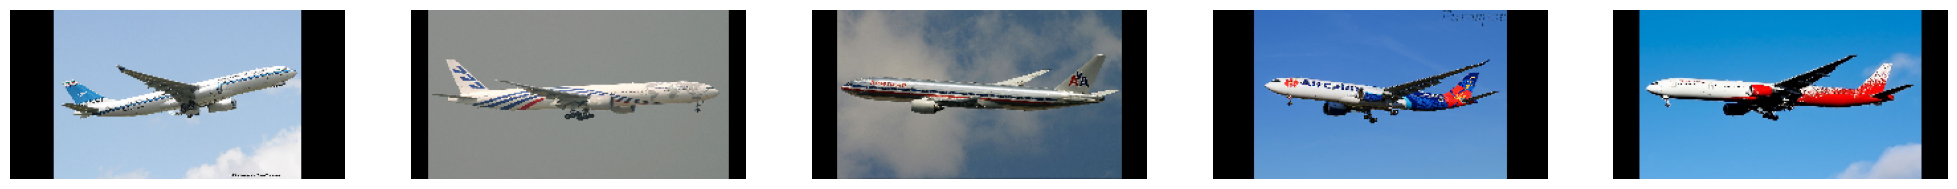

In [ ]:
train_images = load_imageset(TRAIN_DIRECTORY, 'original', 'Обучающая')
val_images = load_imageset(VAL_DIRECTORY, 'original', 'Проверочная')
show_imageset(train_images, 5)

Количество изображений: 931
Количество изображений: 50


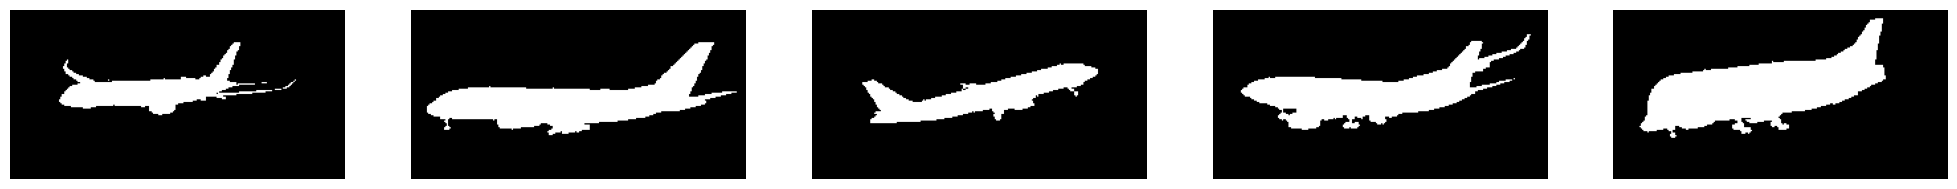

In [ ]:
train_segments = load_imageset(TRAIN_DIRECTORY, 'segment', 'Обучающая')
val_segments = load_imageset(VAL_DIRECTORY, 'segment', 'Проверочная')
show_imageset(train_segments, 5)


In [ ]:
# Цвета пикселов сегментированных изображений
AIRPLANE = (255, 255, 255)      # Самолет (белый)
BACKGROUND = (0, 0, 0)          # Фон (черный)

In [ ]:
CLASS_LABELS = (AIRPLANE, BACKGROUND)

**Создание выборки**
Переведем сегментированные изображения в одноканальные сегментированные с номером класса в каждом пикселе:


In [ ]:
# Функция преобразования цветного сегментированного изображения в метки классов

def rgb_to_labels(image_list  # список цветных изображений
                 ):

    result = []

    # Для всех картинок в списке:
    for d in image_list:
        sample = np.array(d)
        # Создание пустой 1-канальной картики
        y = np.zeros((IMG_WIDTH, IMG_HEIGHT, 1), dtype='uint8')

        # По всем классам:
        for i, cl in enumerate(CLASS_LABELS):
            # Нахождение 3-х канальных пикселей классов и занесение метки класса
            y[np.where(np.all(sample == CLASS_LABELS[i], axis=-1))] = i

        result.append(y)

    return np.array(result)

Обратная функция, перевод одноканальных сегментированных изображений с номером класса в каждом пикселе в 3х канальное RGB сегментированное изображение:

In [ ]:
# Функция преобразования тензора меток класса в цветное сегметрированное изображение

def labels_to_rgb(image_list  # список одноканальных изображений
                 ):

    result = []
    # Для всех картинок в списке:
    for y in image_list:
        # Создание пустой цветной картики
        temp = np.zeros((IMG_WIDTH, IMG_HEIGHT, 3), dtype='uint8')
                # По всем классам:
        for i, cl in enumerate(CLASS_LABELS):
            # Нахождение пикселов класса и заполнение цветом из CLASS_LABELS[i]
            temp[np.where(np.all(y==i, axis=-1))] = CLASS_LABELS[i]

        result.append(temp)

    return np.array(result)


In [ ]:
# Формирование обучающей выборки

x_train = []                          # Cписок под обучающую выборку

for img in train_images:              # Для всех изображений выборки:
    x = image.img_to_array(img)       # Перевод изображения в numpy-массив формы: высота x ширина x количество каналов
    x_train.append(x)                 # Добавление элемента в x_train

x_train = np.array(x_train)           # Перевод всей выборки в numpy
print(x_train.shape)                  # Форма x_train


(931, 128, 253, 3)


In [ ]:
# Формирование проверочной выборки

x_val = []                            # Cписок под проверочную выборку

for img in val_images:                # Для всех изображений выборки:
    x = image.img_to_array(img)       # Перевод изображения в numpy-массив формы: высота x ширина x количество каналов
    x_val.append(x)                   # Добавление элемента в x_train

x_val = np.array(x_val)               # Перевод всей выборки в numpy
print(x_val.shape)                    # Форма x_train


(50, 128, 253, 3)


In [ ]:
y_train = rgb_to_labels(train_segments)
y_val = rgb_to_labels(val_segments)

print(y_train.shape)
print(y_val.shape)

(931, 128, 253, 1)
(50, 128, 253, 1)


In [ ]:
def sequential_segmentation_net(class_count,  # количество классов
                                input_shape   # форма входного изображения
                                ):

    img_input = Input(input_shape)                                              # Создаем входной слой формой input_shape
    x = Conv2D(128, (3, 3), padding='same', name='block1_conv1')(img_input)     # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                                 # Добавляем слой BatchNormalization
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv3')(x)              # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                                 # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                                   # Добавляем слой Activation
    x = Conv2D(32, (3, 3), padding='same', name='block1_conv4')(x)              # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                                 # Добавляем слой BatchNormalization
    x = Activation('relu')(x)
    x = Conv2D(16, (3, 3), padding='same', name='block1_conv5')(x)              # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                                 # Добавляем слой BatchNormalization
    x = Activation('relu')(x)
    x = Conv2D(class_count, (3, 3), activation='softmax', padding='same')(x)    # Добавляем Conv2D-Слой с softmax-активацией на class_count-нейронов
    model = Model(img_input, x)                                                 # Создаем модель с входом 'img_input' и выходом 'x'
    # Компилируем модель
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])

    # Возвращаем сформированную модель
    return model


##### Простая линейная (последовательная) архитектура


In [ ]:
model_seq = sequential_segmentation_net(CLASS_COUNT,
                                       (IMG_WIDTH, IMG_HEIGHT, 3))

model_seq.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 253, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 253, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 128, 253, 128)     512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128, 253, 128)     0         
                                                                 
 block1_conv3 (Conv2D)       (None, 128, 253, 64)      73792     
                                                                 
 batch_normalization_1 (Bat  (None, 128, 253, 64)      256       
 chNormalization)                                            

Epoch 1/10
30/30 [==============================] - 29s 364ms/step - loss: 0.6168 - sparse_categorical_accuracy: 0.7672 - val_loss: 0.9880 - val_sparse_categorical_accuracy: 0.2646
Epoch 2/10
30/30 [==============================] - 7s 246ms/step - loss: 0.4002 - sparse_categorical_accuracy: 0.9134 - val_loss: 0.6324 - val_sparse_categorical_accuracy: 0.7179
Epoch 3/10
30/30 [==============================] - 7s 249ms/step - loss: 0.3113 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.4719 - val_sparse_categorical_accuracy: 0.8863
Epoch 4/10
30/30 [==============================] - 8s 254ms/step - loss: 0.2566 - sparse_categorical_accuracy: 0.9460 - val_loss: 0.3745 - val_sparse_categorical_accuracy: 0.9105
Epoch 5/10
30/30 [==============================] - 8s 257ms/step - loss: 0.2195 - sparse_categorical_accuracy: 0.9518 - val_loss: 0.2690 - val_sparse_categorical_accuracy: 0.9486
Epoch 6/10
30/30 [==============================] - 8s 252ms/step - loss: 0.1926 - sparse_categoric

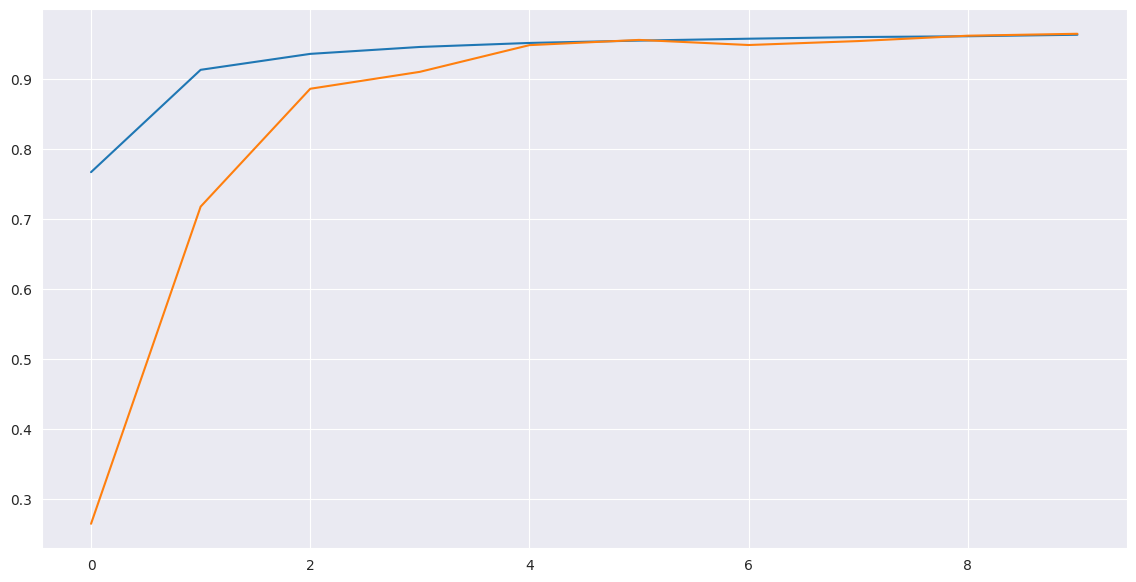

In [ ]:
# Обучение модели

history = model_seq.fit(x_train, y_train,
                        epochs=10, batch_size=32,
                        validation_data=(x_val, y_val))
# Отображение графиков обучения модели
plt.figure(figsize=(14, 7))
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.show()


In [ ]:
# Функция визуализации процесса сегментации изображений, модифицированная для вывода по списку индексов

def process_images(model,                       # обученная модель
                   count=1,                     # количество случайных картинок для сегментации
                   indexes=None,                # список индексов изображений в проверочной выборке
                   ):

    if indexes is None:
        # Генерация случайного списка индексов в количестве count между (0, len(x_val)
        indexes = np.random.randint(0, len(x_val), count)
    else:
        count = len(indexes)

    # Вычисление предсказания сети для картинок с отобранными индексами
    predict = np.argmax(model.predict(x_val[indexes]), axis=-1)

    # Подготовка цветов классов для отрисовки предсказания
    orig = labels_to_rgb(predict[..., None])
    fig, axs = plt.subplots(3, count, figsize=(25, 10))

    # Отрисовка результата работы модели
    for i in range(count):
        # Отображение на графике в первой линии предсказания модели
        axs[0, 0].set_title('Результат работы модели:')
        axs[0, i].imshow(orig[i])
        axs[0, i].axis('off')

        # Отображение на графике во второй линии сегментированного изображения из y_val
        axs[1, 0].set_title('Оригинальное сегментированное')
        axs[1, i].imshow(val_segments[indexes[i]])
        axs[1 ,i].axis('off')

        # Отображение на графике в третьей линии оригинального изображения
        axs[2, 0].set_title('Оригинальное изображение')
        axs[2, i].imshow(val_images[indexes[i]])
        axs[2 ,i].axis('off')

    plt.show()


##### Распознавание

1/1 [==============================] - 1s 914ms/step


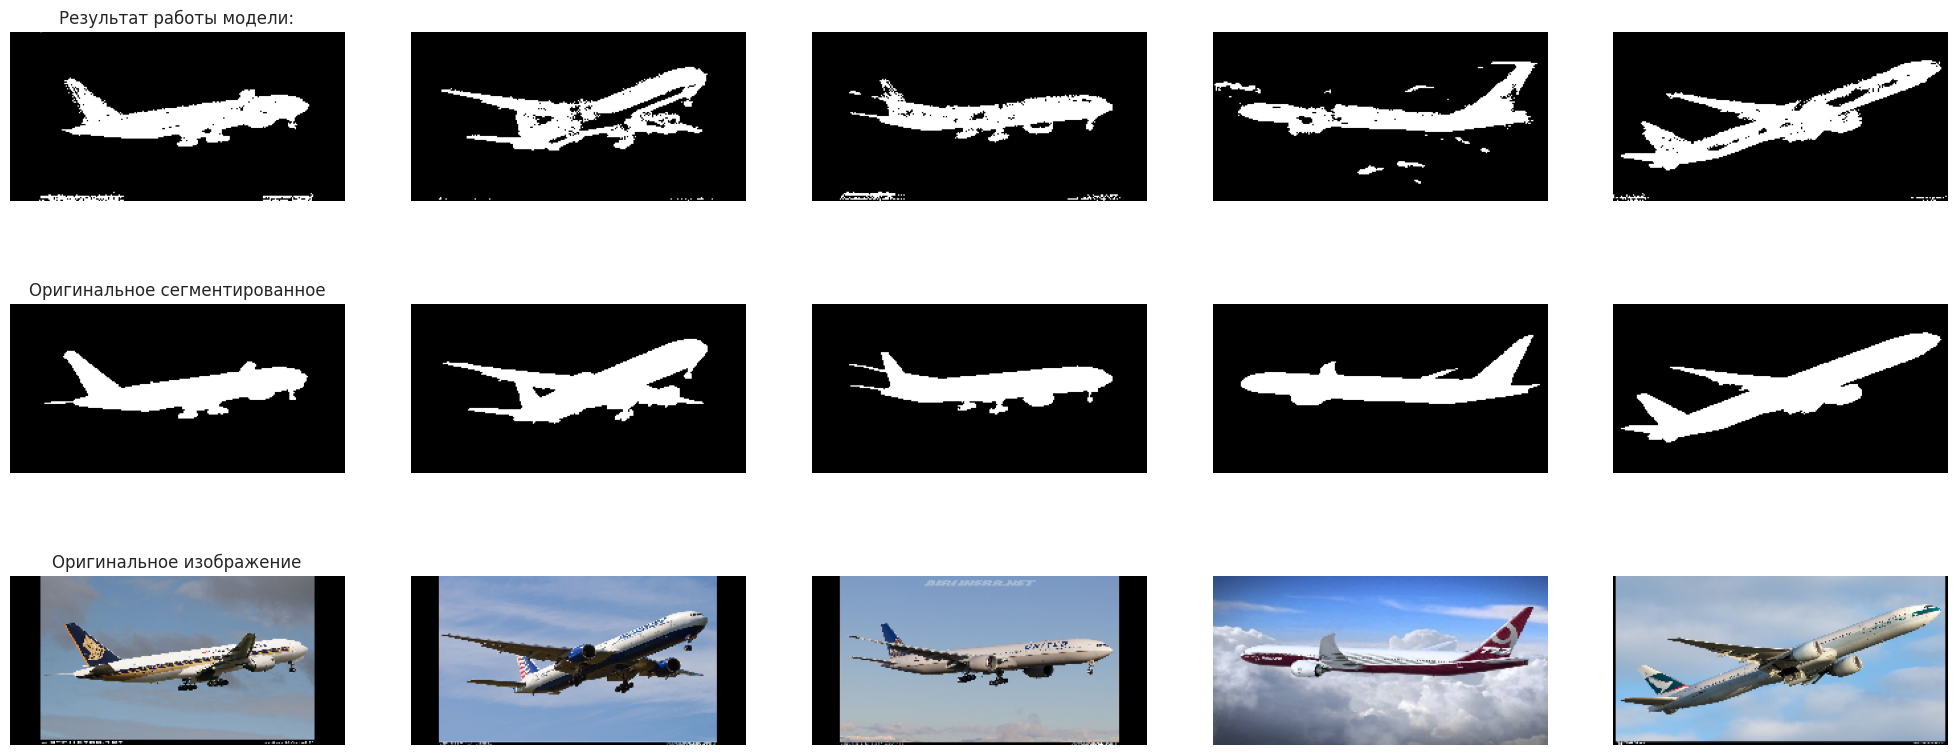

In [ ]:
# Отображение результатов работы модели
process_images(model_seq, 5)


# Задание 1.
Для набора данных создать модель сегментации изображений.
Реализовать сегментацию для 5 классов.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import time, random, gdown, os
from PIL import Image
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
gdown.download('https://drive.google.com/file/d/1FeOJndaT2s3jKkcH1awjjs88uJeJA7bG/view?usp=sharing', None, quiet=True, fuzzy=True)

'construction_256x192.zip'

In [ ]:
!unzip -qo construction_256x192.zip

In [ ]:
IMG_WIDTH = 256               # Ширина картинки
IMG_HEIGHT = 192              # Высота картинки
TRAIN_DIRECTORY = 'train'     # Название папки с файлами обучающей выборки
VAL_DIRECTORY = 'val'         # Название папки с файлами проверочной выборки


# Служебная функция загрузки выборки изображений из файлов в папке
def load_imageset(folder,   # имя папки
                  subset,   # подмножество изображений - оригинальные или сегментированные
                  title     # имя выборки
                  ):

    # Cписок для хранения изображений выборки
    image_list = []

    # Отметка текущего времени
    cur_time = time.time()

    # Для всех файлов в каталоге по указанному пути:
    for filename in sorted(os.listdir(f'{folder}/{subset}')):

        # Чтение очередной картинки и добавление ее в список изображений требуемого размера
        image_list.append(image.load_img(os.path.join(f'{folder}/{subset}', filename),
                                         target_size=(IMG_WIDTH, IMG_HEIGHT)))
            # Вывод количества элементов в выборке
    print('Количество изображений:', len(image_list))
    return image_list

# Функция для просмотра изображений из набора

def show_imageset(image_list,  # выборка изображений
                  n            # количество картинок для просмотра
                  ):

    fig, axs = plt.subplots(1, n, figsize=(25, 10))       # Создание полотна из n графиков

    # Вывод в цикле n случайных изображений
    for i in range(n):
        img = random.choice(image_list)                   # Выборка случайного фото для отображения
        axs[i].axis('off')
        axs[i].imshow(img)                                # Отображение картинки

    plt.show()                                            # Отрисовка изображений


Количество изображений: 1900
Количество изображений: 100


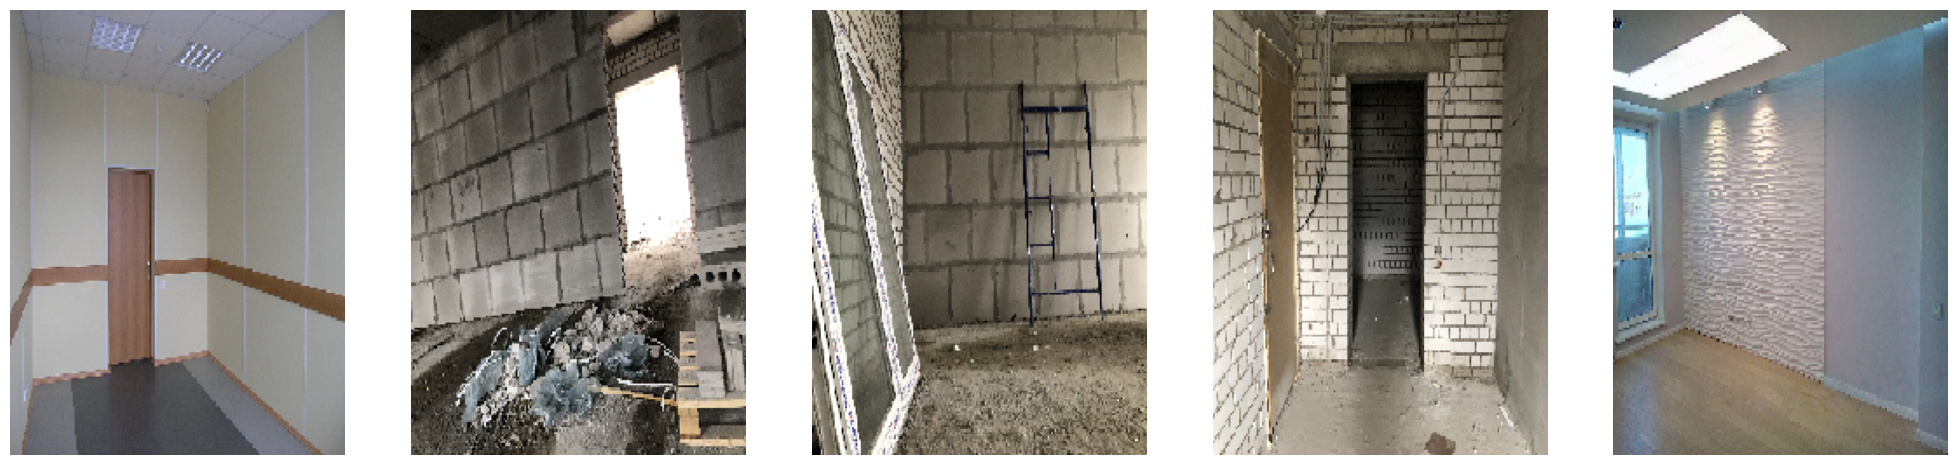

In [ ]:
train_images = load_imageset(TRAIN_DIRECTORY, 'original', 'Обучающая')
val_images = load_imageset(VAL_DIRECTORY, 'original', 'Проверочная')
show_imageset(train_images, 5)

Количество изображений: 1900
Количество изображений: 100


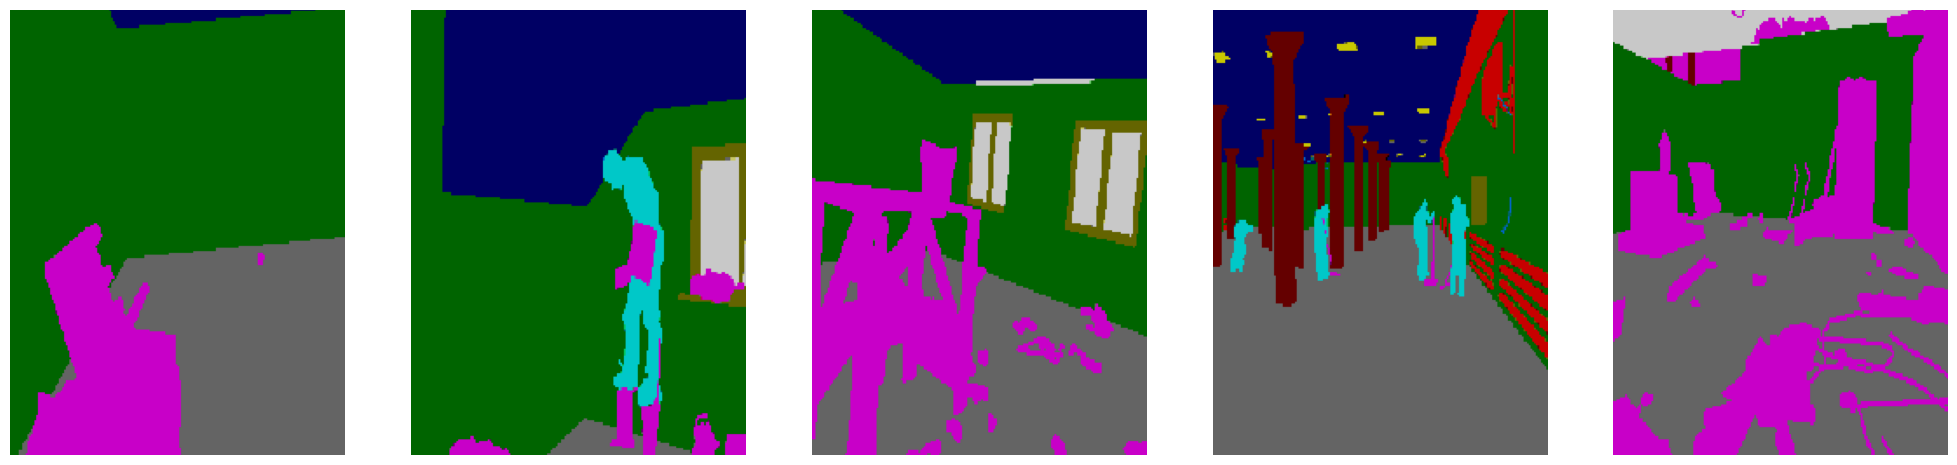

In [ ]:
train_segments = load_imageset(TRAIN_DIRECTORY, 'segment', 'Обучающая')
val_segments = load_imageset(VAL_DIRECTORY, 'segment', 'Проверочная')
show_imageset(train_segments, 5)

In [ ]:
FLOOR = (100, 100, 100)         # Пол (серый)
CEILING = (0, 0, 100)           # Потолок (синий)
WALL = (0, 100, 0)              # Стена (зеленый)
COLUMN = (100, 0, 0)            # Колонна (красный)
APERTURE = (0, 100, 100)        # Проем (темно-бирюзовый)
DOOR = (100, 0, 100)            # Дверь (бордовый)
WINDOW = (100, 100, 0)          # Окно (золотой)
EXTERNAL = (200, 200, 200)      # Внешний мир (светло-серый)
RAILINGS = (0, 200, 0)          # Перила (светло-зеленый)
BATTERY = (200, 0, 0)           # Батареи (светло-красный)
PEOPLE = (0, 200, 200)          # Люди (бирюзовый)
LADDER = (0, 0, 200)            # Лестница (светло-синий)
INVENTORY = (200, 0, 200)       # Инвентарь (розовый)
LAMP = (200, 200, 0)            # Лампа (желтый)
WIRE = (0, 100, 200)            # Провод (голубой)
BEAM = (100, 0, 200)            # Балка (фиолетовый)

In [ ]:
CLASS_LABELS = (FLOOR, CEILING, WALL, COLUMN, APERTURE, DOOR, WINDOW, EXTERNAL, RAILINGS, BATTERY, PEOPLE, LADDER, INVENTORY, LAMP, WIRE, BEAM)

In [ ]:
CLASS_COUNT = len(CLASS_LABELS)

In [ ]:
# Функция преобразования цветного сегментированного изображения в метки классов

def rgb_to_labels(image_list  # список цветных изображений
                 ):

    result = []

    # Для всех картинок в списке:
    for d in image_list:
        sample = np.array(d)
        # Создание пустой 1-канальной картики
        y = np.zeros((IMG_WIDTH, IMG_HEIGHT, 1), dtype='uint8')

        # По всем классам:
        for i, cl in enumerate(CLASS_LABELS):
            # Нахождение 3-х канальных пикселей классов и занесение метки класса
            y[np.where(np.all(sample == CLASS_LABELS[i], axis=-1))] = i

        result.append(y)

    return np.array(result)

In [ ]:
# Функция преобразования тензора меток класса в цветное сегметрированное изображение

def labels_to_rgb(image_list  # список одноканальных изображений
                 ):

    result = []
    # Для всех картинок в списке:
    for y in image_list:
        # Создание пустой цветной картики
        temp = np.zeros((IMG_WIDTH, IMG_HEIGHT, 3), dtype='uint8')
                # По всем классам:
        for i, cl in enumerate(CLASS_LABELS):
            # Нахождение пикселов класса и заполнение цветом из CLASS_LABELS[i]
            temp[np.where(np.all(y==i, axis=-1))] = CLASS_LABELS[i]

        result.append(temp)

    return np.array(result)

In [ ]:
# Формирование обучающей выборки

x_train = []                          # Cписок под обучающую выборку

for img in train_images:              # Для всех изображений выборки:
    x = image.img_to_array(img)       # Перевод изображения в numpy-массив формы: высота x ширина x количество каналов
    x_train.append(x)                 # Добавление элемента в x_train

x_train = np.array(x_train)           # Перевод всей выборки в numpy
print(x_train.shape)                  # Форма x_train


(1900, 256, 192, 3)


In [ ]:
# Формирование проверочной выборки

x_val = []                            # Cписок под проверочную выборку

for img in val_images:                # Для всех изображений выборки:
    x = image.img_to_array(img)       # Перевод изображения в numpy-массив формы: высота x ширина x количество каналов
    x_val.append(x)                   # Добавление элемента в x_train

x_val = np.array(x_val)               # Перевод всей выборки в numpy
print(x_val.shape)                    # Форма x_train


(100, 256, 192, 3)


In [ ]:
y_train = rgb_to_labels(train_segments)
y_val = rgb_to_labels(val_segments)

print(y_train.shape)
print(y_val.shape)

(1900, 256, 192, 1)
(100, 256, 192, 1)


In [ ]:
# Функция визуализации процесса сегментации изображений, модифицированная для вывода по списку индексов

def process_images(model,                       # обученная модель
                   count=1,                     # количество случайных картинок для сегментации
                   indexes=None,                # список индексов изображений в проверочной выборке
                   ):

    if indexes is None:
        # Генерация случайного списка индексов в количестве count между (0, len(x_val)
        indexes = np.random.randint(0, len(x_val), count)
    else:
        count = len(indexes)

    # Вычисление предсказания сети для картинок с отобранными индексами
    predict = np.argmax(model.predict(x_val[indexes]), axis=-1)

    # Подготовка цветов классов для отрисовки предсказания
    orig = labels_to_rgb(predict[..., None])
    fig, axs = plt.subplots(3, count, figsize=(25, 10))

    # Отрисовка результата работы модели
    for i in range(count):
        # Отображение на графике в первой линии предсказания модели
        axs[0, 0].set_title('Результат работы модели:')
        axs[0, i].imshow(orig[i])
        axs[0, i].axis('off')

        # Отображение на графике во второй линии сегментированного изображения из y_val
        axs[1, 0].set_title('Оригинальное сегментированное')
        axs[1, i].imshow(val_segments[indexes[i]])
        axs[1 ,i].axis('off')

        # Отображение на графике в третьей линии оригинального изображения
        axs[2, 0].set_title('Оригинальное изображение')
        axs[2, i].imshow(val_images[indexes[i]])
        axs[2 ,i].axis('off')

    plt.show()

In [ ]:
def unet(class_count,   # количество классов
         input_shape    # форма входного изображения
         ):

    img_input = Input(input_shape)                                          # Создаем входной слой формой input_shape

    ''' Block 1 '''
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)  # Добавляем Conv2D-слой с 64-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)          # Добавляем Conv2D-слой с 64-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    block_1_out = Activation('relu')(x)                                     # Добавляем слой Activation и запоминаем в переменной block_1_out

    x = MaxPooling2D()(block_1_out)                                         # Добавляем слой MaxPooling2D

    ''' Block 2 '''
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)         # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)         # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    block_2_out = Activation('relu')(x)                                     # Добавляем слой Activation и запоминаем в переменной block_2_out

    x = MaxPooling2D()(block_2_out)                                         # Добавляем слой MaxPooling2D

    ''' Block 3 '''
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)         # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)         # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)         # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    block_3_out = Activation('relu')(x)                                     # Добавляем слой Activation и запоминаем в переменной block_3_out

    x = MaxPooling2D()(block_3_out)                                         # Добавляем слой MaxPooling2D

    ''' Block 4 '''
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)         # Добавляем Conv2D-слой с 512-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)         # Добавляем Conv2D-слой с 512-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)         # Добавляем Conv2D-слой с 512-нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    block_4_out = Activation('relu')(x)                                     # Добавляем слой Activation и запоминаем в переменной block_4_out
    x = block_4_out

    ''' UP 2 '''
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)     # Добавляем слой Conv2DTranspose с 256 нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = concatenate([x, block_3_out])                                       # Объединяем текущий слой со слоем block_3_out
    x = Conv2D(256, (3, 3), padding='same')(x)                              # Добавляем слой Conv2D с 256 нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    ''' UP 3 '''
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)     # Добавляем слой Conv2DTranspose с 128 нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = concatenate([x, block_2_out])                                       # Объединяем текущий слой со слоем block_2_out
    x = Conv2D(128, (3, 3), padding='same')(x)                              # Добавляем слой Conv2D с 128 нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = Conv2D(128, (3, 3), padding='same')(x)                              # Добавляем слой Conv2D с 128 нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    ''' UP 4 '''
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)      # Добавляем слой Conv2DTranspose с 64 нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = concatenate([x, block_1_out])                                       # Объединяем текущий слой со слоем block_1_out
    x = Conv2D(64, (3, 3), padding='same')(x)                               # Добавляем слой Conv2D с 64 нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = Conv2D(64, (3, 3), padding='same')(x)                               # Добавляем слой Conv2D с 64 нейронами
    x = BatchNormalization()(x)                                             # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                               # Добавляем слой Activation

    x = Conv2D(class_count, (3, 3), activation='softmax', padding='same')(x)  # Добавляем Conv2D-Слой с softmax-активацией на class_count-нейронов

    model = Model(img_input, x)                                             # Создаем модель с входом 'img_input' и выходом 'x'

    # Компилируем модель
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])

    # Возвращаем сформированную модель
    return model


In [ ]:
model_unet = unet(CLASS_COUNT,
                  (IMG_WIDTH, IMG_HEIGHT, 3))

model_unet.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 192, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 256, 192, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 256, 192, 64)         256       ['block1_conv1[0][0]']        
 chNormalization)                                                                                 
                                                                                                  
 activation_4 (Activation)   (None, 256, 192, 64)         0         ['batch_normalization_4[

In [ ]:
import gc
n = gc.collect()
history = model_unet.fit(x_train, y_train,
                         epochs=10, batch_size=12,
                         validation_data=(x_val, y_val))


Epoch 1/10
159/159 [==============================] - 117s 579ms/step - loss: 1.4983 - sparse_categorical_accuracy: 0.5601 - val_loss: 1.6511 - val_sparse_categorical_accuracy: 0.4947
Epoch 2/10
159/159 [==============================] - 84s 531ms/step - loss: 1.0265 - sparse_categorical_accuracy: 0.6839 - val_loss: 1.3362 - val_sparse_categorical_accuracy: 0.5999
Epoch 3/10
159/159 [==============================] - 86s 540ms/step - loss: 0.9132 - sparse_categorical_accuracy: 0.7178 - val_loss: 1.2784 - val_sparse_categorical_accuracy: 0.6173
Epoch 4/10
159/159 [==============================] - 86s 540ms/step - loss: 0.8508 - sparse_categorical_accuracy: 0.7358 - val_loss: 1.2678 - val_sparse_categorical_accuracy: 0.6146
Epoch 5/10
159/159 [==============================] - 85s 535ms/step - loss: 0.7902 - sparse_categorical_accuracy: 0.7532 - val_loss: 1.2648 - val_sparse_categorical_accuracy: 0.6185
Epoch 6/10
159/159 [==============================] - 86s 539ms/step - loss: 0.7342 

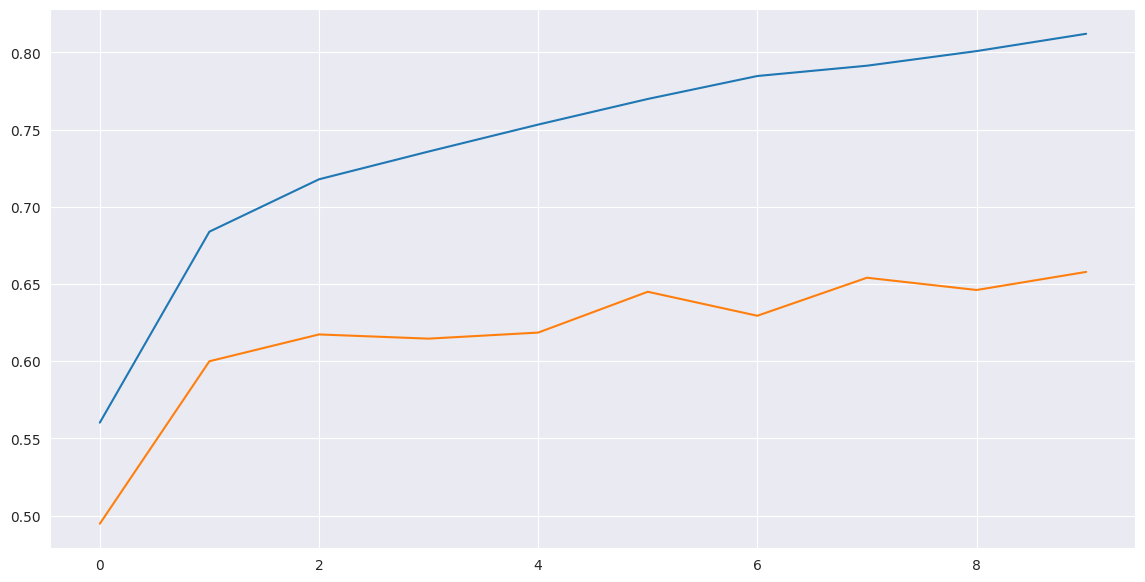

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.show()

1/1 [==============================] - 3s 3s/step


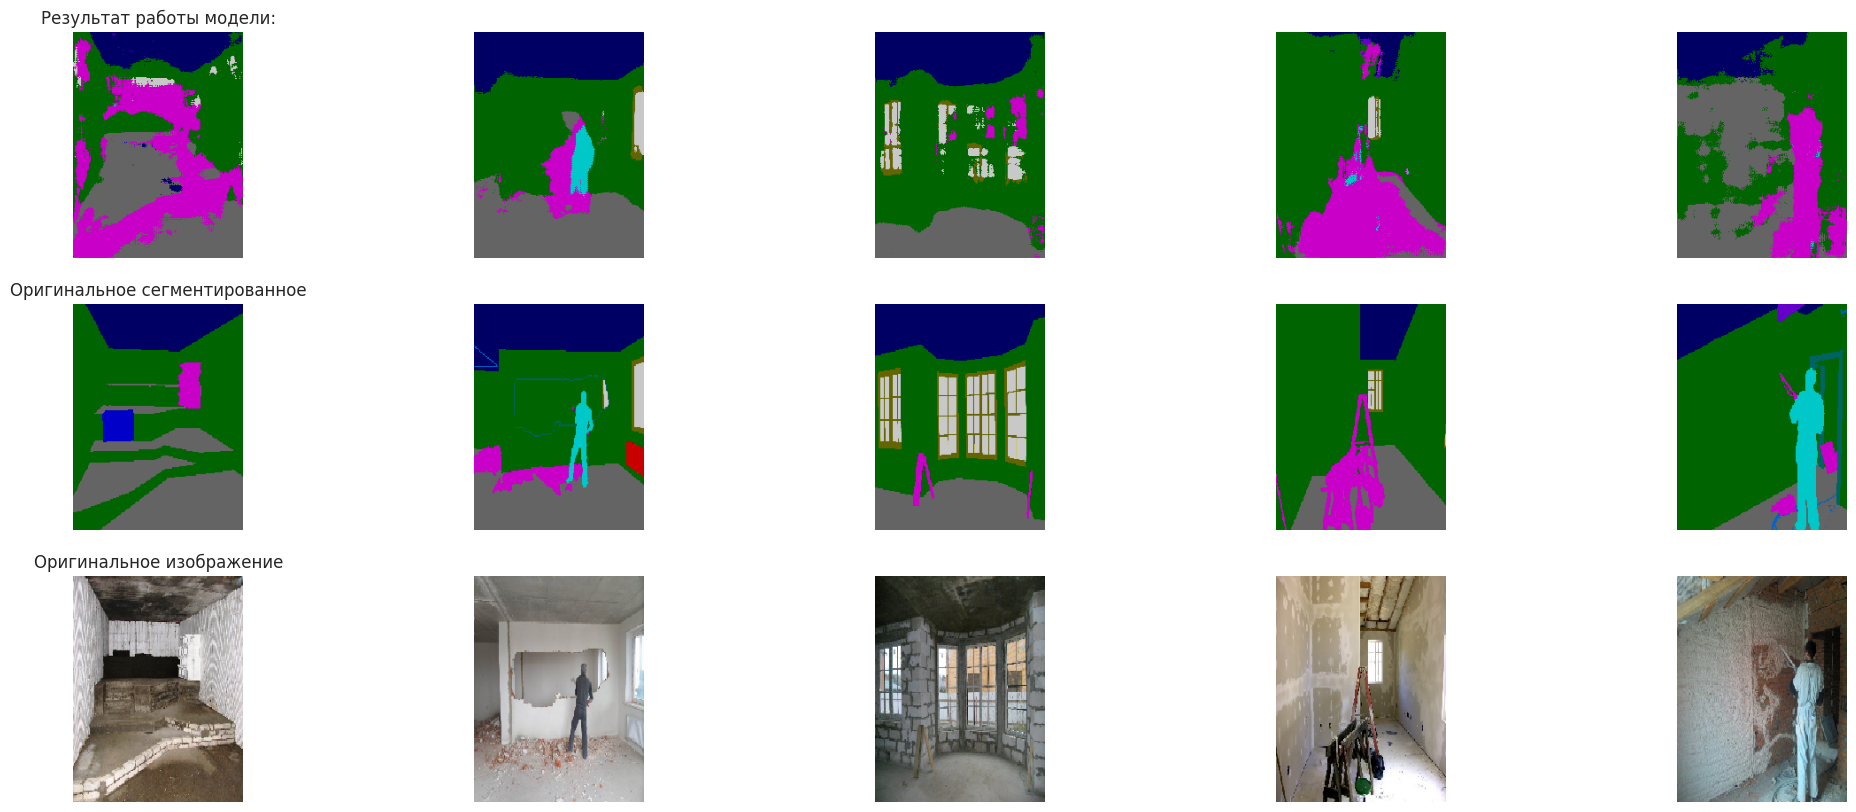

In [ ]:
# Отображение результатов работы модели
process_images(model_unet, 5)